<a href="https://colab.research.google.com/github/lsmanoel/database_tactilus/blob/master/frameShow_IzacDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install minisom

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
from minisom import MiniSom
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tabulate import tabulate
import pylab
from pylab import pcolor, colorbar, plot

In [0]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [0]:
data_pd = pd.read_csv('gdrive/My Drive/Colab Notebooks/izac/dataset/database_csv/auto_paralelepipedo_csv/Izac_vibr_manta_paral_AUT.csv')
data_np = data_pd.values

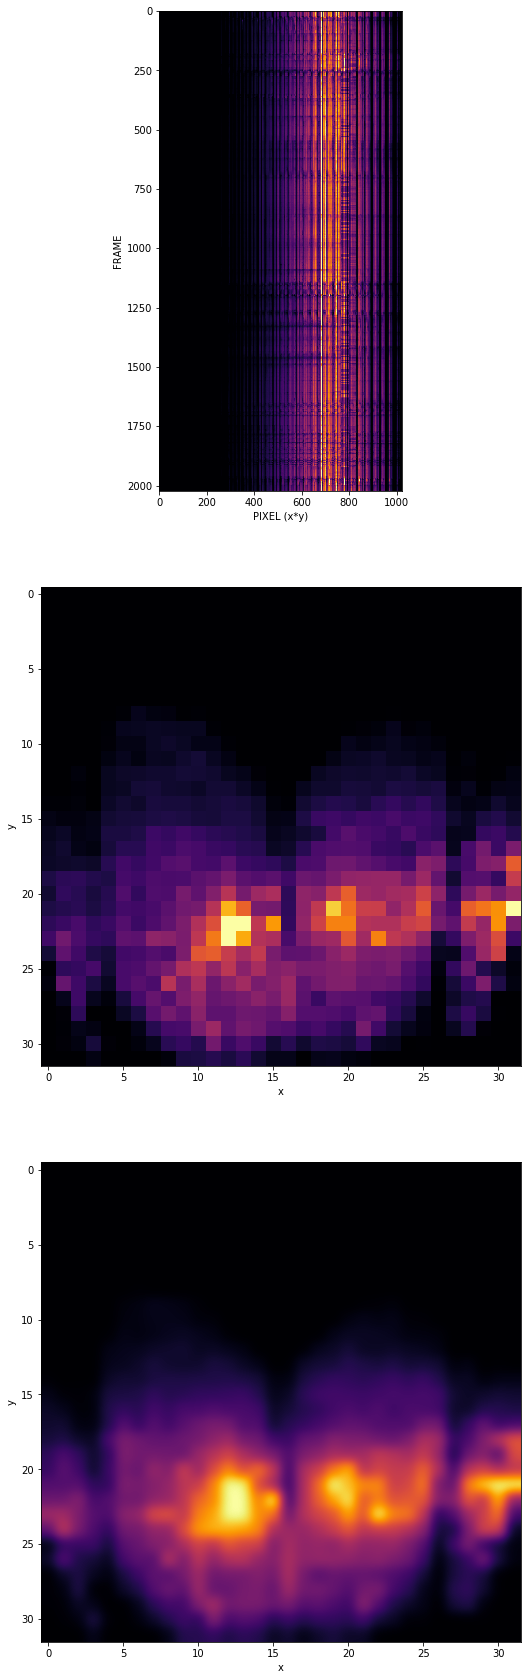

In [0]:
import matplotlib.pyplot as plt
# ==============================================================================  
fig = plt.figure(figsize=(12, 30))

# ------------------------------------------------------------------------------
ax = fig.add_subplot(3, 1, 1)

img = ax.imshow(data_np, 
#                 interpolation ='gaussian', 
                cmap ='inferno')

plt.xlabel('PIXEL (x*y)')
plt.ylabel('FRAME')

# ------------------------------------------------------------------------------
ax = fig.add_subplot(3, 1, 2)

frame_np = data_np[100, :]
frame_np = frame_np.reshape((32, 32))

img = ax.imshow(frame_np, 
#                 interpolation ='gaussian', 
                cmap ='inferno')

plt.xlabel('x')
plt.ylabel('y')

# ------------------------------------------------------------------------------
ax = fig.add_subplot(3, 1, 3)

frame_np = data_np[404, :]
frame_np = frame_np.reshape((32, 32))

img = ax.imshow(frame_np, 
                interpolation ='gaussian', 
                cmap ='inferno')

plt.xlabel('x')
plt.ylabel('y')

#===============================================================================
plt.show()

In [0]:
normalizer = MinMaxScaler(feature_range =(0,1))
data_np = normalizer.fit_transform(data_np)

**Size of SOM**
according to [Jing Tian et al](https://drive.google.com/open?id=1r-NTmo4G6K0U2z6_bTyzqzG1dsZzbw-i):
$$5\sqrt{N}$$
$$N=853$$
$$5\sqrt{853}\simeq146$$
$$\sqrt{146}\simeq12$$
$$M=12\times12$$
Where **M is the number of neurons**, which is an integer close to the result of the right hand side of the equation, and **N is the number of observations**.
Note, that M is the total number of neurons. If your map is quadratic, then use the square root of M to obtain the number of neurons in one row.

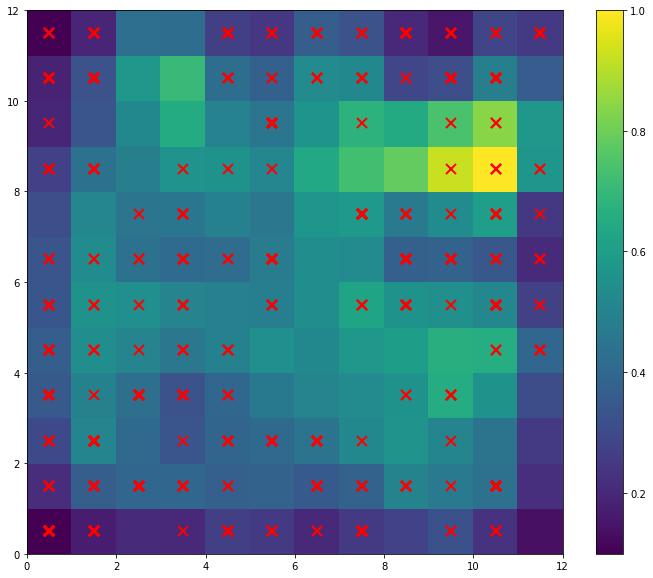

In [0]:
SOM = MiniSom(x = 12, y = 12, input_len = 1024, random_seed = 0)

SOM.random_weights_init(data_np)
SOM.train_random(data = data_np, num_iteration = 300)

pylab.figure(figsize=(12, 10))

pcolor(SOM.distance_map().T)
colorbar()

markers = ['o', 'x']
colors = ['b', 'r']

for i, x in enumerate(data_np):
  w = SOM.winner(x)
  plot(w[0] + 0.5, 
       w[1] + 0.5,
       markers[1],
       markerfacecolor = 'None',
       markersize =10,
       markeredgecolor = colors[1],
       markeredgewidth = 2)